<a href="https://colab.research.google.com/github/LAKSH3002/Airline-Passenger-Analytics/blob/main/Airline_Passenger_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing The necessary modules, and then Importing Dataset**

In [67]:
# Problem statements solved in this project:
#Q1 - What is the distribution of gender, nationality, flight status, airport continent and continent
#Q2 - Which specific airport has most amount of delays? Take out top 10.
#Q3 - Which airport had the maximum amount of on-time flights? Take out top 10
#Q4 - Which airport had maxiumum amount of cancelled flights? Take out top 10
#Q5 - Find out the number of passengers with an age greater than 30,40,50,60: Like give range and check.
#Q6 - Nationality vs Flight delay status (Which country had the maximum amount of delayed flights) - Passenger Profile Insights
#Q7 - Find out the airport with maximum flight delays and its percentage (Airport + delay percentage) - Operational profile insights
#Q8 - For each continent calculate the percentage of delays, on-time flights and cancelled flights

In [60]:
import numpy as np
import pandas as pd
print(pd.__version__)
print(np.__version__)
from google.colab import drive
drive.mount('/content/drive') # Updated mountpoint to a valid local directory

2.2.2
2.0.2
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the CSV FILE**

In [61]:
# Reading the csv file
Dataset_file = pd.read_csv('/content/drive/My Drive/Airline Analytics project/Airline Dataset.csv')
print(Dataset_file.info())
print(Dataset_file.isnull().sum())
# This is a cleaned dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

**Description and Head of the CSV File**

In [62]:
# Display of the data set that is going to be used
print(Dataset_file.describe())
# The description is only for the numerical columns.
print()
print(Dataset_file.head(20))
# Columns with most importance here can be Gender, Age, Nationality, Airport Name, country code, Flight delay status

       Passenger ID           Age
count  98619.000000  98619.000000
mean   55168.689522     45.504021
std    25985.443696     25.929849
min    10000.000000      1.000000
25%    32608.000000     23.000000
50%    55338.000000     46.000000
75%    77695.000000     68.000000
max    99999.000000     90.000000

    Passenger ID First Name       Last Name  Gender  Age  \
0          10856     Edithe          Leggis  Female   62   
1          43872     Elwood            Catt    Male   62   
2          42633      Darby         Felgate    Male   67   
3          78493   Dominica            Pyle  Female   71   
4          82072        Bay         Pencost    Male   21   
5          39630       Lora         Durbann  Female   55   
6          11940       Rand            Bram    Male   73   
7          26470   Perceval        Dallosso    Male   36   
8          29447      Aleda          Pigram  Female   35   
9          75035     Burlie         Schustl    Male   13   
10         29278      Porty      

**Beginning of Exploratory Data Analysis (EDA) - Single Columns counts**

In [63]:
# gender, Nationality, flight status, Airport continent, Continent distribution
# So we are calculating the gender count using the value_counts() option.
# Value_counts() belongs to Pandas, and is used to return the count of unique values in a column, in descending order.

# Variable to store gender, nationality, flight status, airport continent, continent count
gender_count = Dataset_file['Gender'].value_counts()
Nationality_count = Dataset_file['Nationality'].value_counts()
flightstatus_count = Dataset_file['Flight Status'].value_counts()
airportcontinent_count = Dataset_file['Airport Continent'].value_counts()
continent_count = Dataset_file['Continents'].value_counts()

# Percentage of each gender
gender_percentage = Dataset_file['Gender'].value_counts(normalize=True)*100
Nationality_percentage = Dataset_file['Nationality'].value_counts(normalize=True)*100
flightstatus_percentage = Dataset_file['Flight Status'].value_counts(normalize=True)*100
airportcontinent_percentage = Dataset_file['Airport Continent'].value_counts(normalize=True)*100
continent_percentage = Dataset_file['Continents'].value_counts(normalize=True)*100

# Displaying results for Gender
print("Counts\n", gender_count)
print()
print("Percentage\n", gender_percentage)
print()

# Displaying results for country name
print("Counts\n", Nationality_count)
print()

# Displaying results for flight status
print("Counts\n", flightstatus_count)
print()
print("Flight status\n",flightstatus_percentage)
print()

# Displaying results for airport continent
print("Counts\n", airportcontinent_count)
print()

# Displaying results for continent
print("Counts\n", continent_count)
print()

Counts
 Gender
Male      49598
Female    49021
Name: count, dtype: int64

Percentage
 Gender
Male      50.29254
Female    49.70746
Name: proportion, dtype: float64

Counts
 Nationality
China                          18317
Indonesia                      10559
Russia                          5693
Philippines                     5239
Brazil                          3791
                               ...  
French Southern Territories        2
Saint Martin                       2
Norfolk Island                     1
Jersey                             1
Sint Maarten                       1
Name: count, Length: 240, dtype: int64

Counts
 Flight Status
Cancelled    32942
On Time      32846
Delayed      32831
Name: count, dtype: int64

Flight status
 Flight Status
Cancelled    33.403300
On Time      33.305955
Delayed      33.290745
Name: proportion, dtype: float64

Counts
 Airport Continent
NAM    32033
AS     18637
OC     13866
EU     12335
AF     11030
SAM    10718
Name: count, dtype: int64


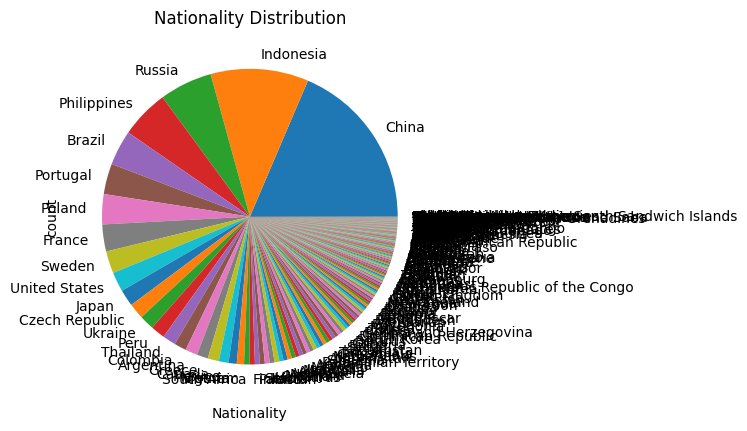

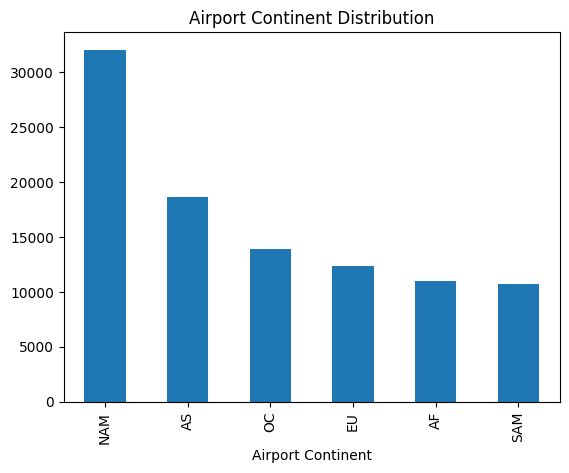

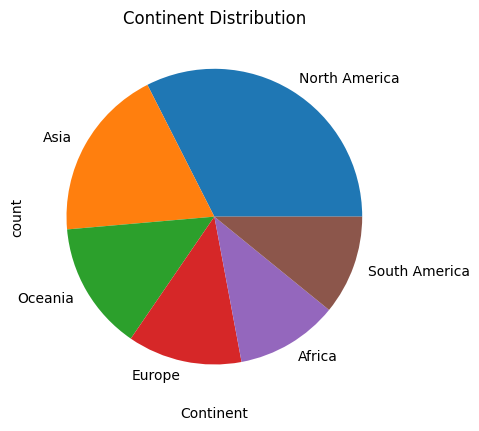

In [64]:
# Graphs for distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Nationality
print()
Nationality_count.plot(kind='pie', title='Nationality Distribution')
plt.xlabel('Nationality')
plt.show()

# Airport Continent
print()
airportcontinent_count.plot(kind='bar', title='Airport Continent Distribution')
plt.xlabel('Airport Continent')
plt.show()

# Continent
print()
continent_count.plot(kind='pie', title='Continent Distribution')
plt.xlabel('Continent')
plt.show()

Delayed Flights
 Airport Name
Santa Maria Airport              17
Santa Rosa Airport               16
San Pedro Airport                15
Santa Ana Airport                14
Lake County Airport              13
Sawan Airport                    13
Visby Airport                    13
Grant County Airport             12
La Florida Airport               12
Chu Lai International Airport    12
Name: count, dtype: int64



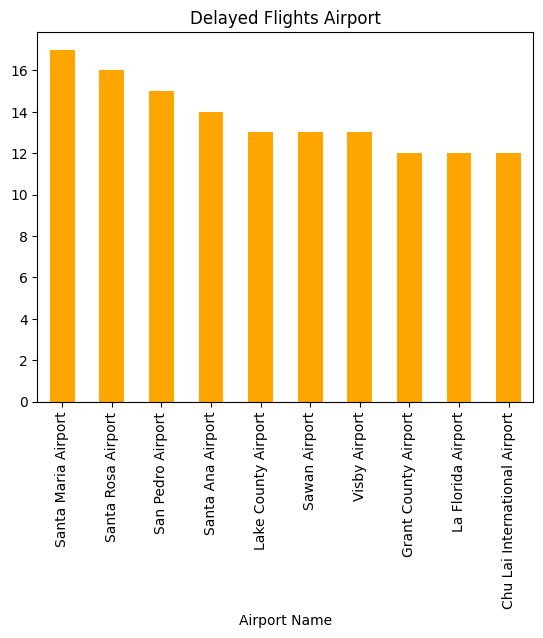


On Time Flights
 Airport Name
San Pedro Airport                                   17
Santa Ana Airport                                   15
Mount Pleasant Airport                              13
Böblingen Flugfeld                                  13
OR Tambo International Airport                      13
Del Caribe Santiago Mariño International Airport    13
Mercer County Airport                               13
Newcastle Airport                                   12
Zaraza Airport                                      12
Council Airport                                     12
Name: count, dtype: int64



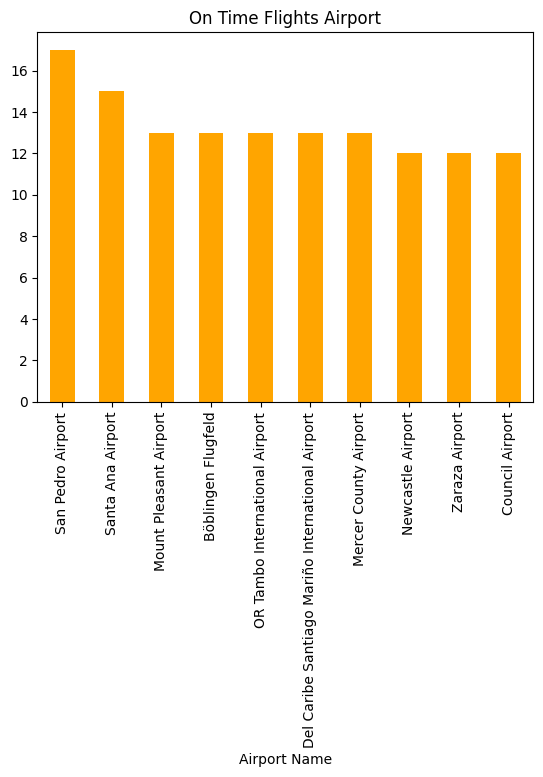


Cancelled Flights
 Airport Name
Böblingen Flugfeld            13
Mae Hong Son Airport          13
Kiunga Airport                13
Yangzhou Taizhou Airport      13
Marion Municipal Airport      12
Santa Maria Airport           12
Capital City Airport          12
Circle Hot Springs Airport    12
Klagenfurt Airport            12
Danilo Atienza Air Base       12
Name: count, dtype: int64


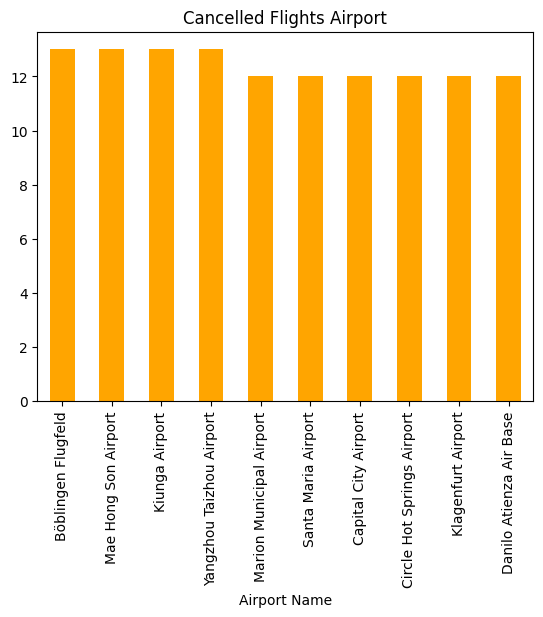

In [65]:
import matplotlib.pyplot as plt
# Problem statement
# Q1) Which specific airport has most amount of delays? Take out top 10.
# Logic: Take airport name, flight status and match them.
# Filtering the column flight delay
delayed_df = Dataset_file[Dataset_file['Flight Status']=='Delayed']
# print(delayed_df)
airport_delay_count = delayed_df['Airport Name'].value_counts().head(10)
print("Delayed Flights\n",airport_delay_count)
print()
# Plotting Graph
airport_delay_count.plot(kind='bar', color='orange')
plt.title('Delayed Flights Airport')
plt.show()
print()

# Q2) Which airport has the maximum amount of on-time flights? Take out top 10
ontime_df = Dataset_file[Dataset_file['Flight Status']=='On Time']
airport_ontime_flights = ontime_df['Airport Name'].value_counts().head(10)
print("On Time Flights\n",airport_ontime_flights)
print()
# Plotting Graph
airport_ontime_flights.plot(kind='bar', color='orange')
plt.title('On Time Flights Airport')
plt.show()
print()

# Q3) Which airport had maxiumum amount of cancelled flights?
cancelled_df = Dataset_file[Dataset_file['Flight Status']=='Cancelled']
airport_cancelled_flights = cancelled_df['Airport Name'].value_counts().head(10)
print("Cancelled Flights\n",airport_cancelled_flights)
# Plotting Graph
airport_cancelled_flights.plot(kind='bar', color='orange')
plt.title('Cancelled Flights Airport')
plt.show()
print()

Age Group
<30      31838
30-40    10811
40-50    11061
50-60    11037
60-70    10980
70+      21816
Name: count, dtype: int64


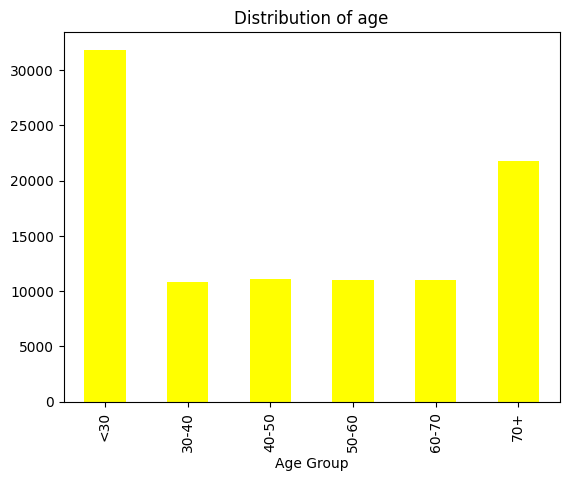

In [66]:
# Next Problem Statement
# Q1) Find out the number of passengers with an age greater than 30,40,50,60: Like give range and check.
import pandas as pd
import matplotlib.pyplot as plt
bins = [0,30,40,50,60,70,90]
ranges = ['<30', '30-40', '40-50', '50-60', '60-70', '70+']

# Creating a new column for age group
Dataset_file['Age Group'] = pd.cut(Dataset_file['Age'], bins=bins, labels=ranges, right=False)

# Count passengers in each group
age_group_counts = Dataset_file['Age Group'].value_counts().sort_index()

print(age_group_counts)
age_group_counts.plot(kind='bar', color='yellow')
plt.title('Distribution of age')
plt.show()

In [81]:
# Next Q) Nationality vs Flight delay status
# In this problem statement we are finding the passengers with a specific nationality and their experience with flight journey
# Whether their flights were delayed, on time or cancelled
grouping = Dataset_file.groupby(['Nationality', 'Flight Status']).size().reset_index(name='count')
print(grouping.head(10))
print()

# Counting total number of unique Nationality in the dataset
total_countries_dataset = Dataset_file['Nationality'].nunique()
print('Total Number of Unique Nationality:',total_countries_dataset)
print()

# Counting the number of people belonging to a particular nation who sat in a flight
total_flights = Dataset_file.groupby(['Nationality']).size().reset_index(name='Total flights')

# Delayed flight of the people of a particular nation whose flight got delayed.
delayed_flights = Dataset_file[Dataset_file['Flight Status'] =='Delayed'].groupby('Nationality').size().reset_index(name='Delayed flights')

# Merge the two counts
delay_stats = pd.merge(total_flights, delayed_flights, on='Nationality', how='left')

# Fill NaN - Handling missing values
delay_stats['Delayed flights'] = delay_stats['Delayed flights'].fillna(0)

# Calculate delay percentage
delay_stats['delay_percentage'] = (delay_stats['Delayed flights'] / delay_stats['Total flights']) * 100
print(delay_stats.sort_values(by='delay_percentage', ascending=False).head(10))

     Nationality Flight Status  count
0    Afghanistan     Cancelled    139
1    Afghanistan       Delayed    123
2    Afghanistan       On Time    132
3  Aland Islands     Cancelled      5
4  Aland Islands       Delayed      7
5  Aland Islands       On Time      8
6        Albania     Cancelled    150
7        Albania       Delayed    144
8        Albania       On Time    151
9        Algeria     Cancelled      2

Total Number of Unique Nationality: 240

               Nationality  Total flights  Delayed flights  delay_percentage
169               Pitcairn              3              3.0        100.000000
44        Christmas Island              3              2.0         66.666667
187  Sao Tome and Principe              3              2.0         66.666667
68        Falkland Islands              3              2.0         66.666667
70                    Fiji              8              5.0         62.500000
235      Wallis and Futuna              8              5.0         62.500000
2

In [80]:
# Q7) Find out the airport with maximum flight delays and its percentage (Airport + delay percentage)
# This time its with respect to airports
# Airport name is the name of the airport from where the flight took off.
grouping_airport = Dataset_file.groupby(['Airport Name','Country Name','Flight Status']).size().reset_index(name='count')
print(grouping_airport.head(10))
print()

# Total number of airports in the dataset (Number of airports from where flight has taken off): 9062
total_airports_count = Dataset_file['Airport Name'].nunique()
print('Total Number of Unique Countries:',total_airports_count)

# Now we have to check the total number of flights per airport
total_flights_per_airport = Dataset_file.groupby(['Airport Name']).size().reset_index(name='Total flights')

# Next we check the number of delayed flights from each airport
delayed_flights_per_airport = Dataset_file[Dataset_file['Flight Status'] =='Delayed'].groupby('Airport Name').size().reset_index(name='Delayed flights')

# Now we can calculate the delay percentage (The percentage of flights from the total that got delayed from a specific airport)
delay_stats_airport = pd.merge(total_flights_per_airport, delayed_flights_per_airport, on='Airport Name', how='left')
print()

# Fill NaN - Handling missing values
delay_stats_airport['Delayed flights'] = delay_stats_airport['Delayed flights'].fillna(0)

# Delay percentage
delay_stats_airport['delay_percentage'] = (delay_stats_airport['Delayed flights'] / delay_stats_airport['Total flights']) * 100
print(delay_stats_airport.sort_values(by='delay_percentage', ascending=False).head(10))

                              Airport Name   Country Name Flight Status  count
0                  28 de Noviembre Airport      Argentina     Cancelled      4
1                  28 de Noviembre Airport      Argentina       Delayed      5
2                  28 de Noviembre Airport      Argentina       On Time      7
3  9 de Maio - Teixeira de Freitas Airport         Brazil     Cancelled      2
4  9 de Maio - Teixeira de Freitas Airport         Brazil       Delayed      4
5  9 de Maio - Teixeira de Freitas Airport         Brazil       On Time      4
6                         A Coruña Airport          Spain     Cancelled      5
7                         A Coruña Airport          Spain       Delayed      2
8                         A Coruña Airport          Spain       On Time      4
9         A L Mangham Jr. Regional Airport  United States     Cancelled      3

Total Number of Unique Countries: 9062

                                Airport Name  Total flights  Delayed flights  \
3626      

In [78]:
# For each continent calculate the percentage of delays, on-time flights and cancelled flights
grouping_continent = Dataset_file.groupby(['Continents','Flight Status']).size().reset_index(name='count')
print(grouping_continent.head(6))

# Total number of flights taking off from each continent
total_flights_per_continent = Dataset_file.groupby(['Continents']).size().reset_index(name='Total flights')

# Total number of delayed, ontime and cancelled flights
delayed_flights_per_continent = Dataset_file[Dataset_file['Flight Status'] =='Delayed'].groupby('Continents').size().reset_index(name='Delayed flights')
ontime_flights_per_continent = Dataset_file[Dataset_file['Flight Status'] =='On Time'].groupby('Continents').size().reset_index(name='On-time flights')
cancelled_flights_per_continent = Dataset_file[Dataset_file['Flight Status'] =='Cancelled'].groupby('Continents').size().reset_index(name='Cancelled flights')

# Merging counts
delay_stats_continent = total_flights_per_continent.merge(delayed_flights_per_continent, on='Continents', how='left').merge(ontime_flights_per_continent, on='Continents', how='left').merge(cancelled_flights_per_continent, on='Continents', how='left')
print()

# No need to handle any missing values because there is no NaN values in any continents.

# Calculate percentages
delay_stats_continent['Delayed percentage'] = (delay_stats_continent['Delayed flights'] / delay_stats_continent['Total flights']) * 100
delay_stats_continent['On-time percentage'] = (delay_stats_continent['On-time flights'] / delay_stats_continent['Total flights']) * 100
delay_stats_continent['Cancelled percentage'] = (delay_stats_continent['Cancelled flights'] / delay_stats_continent['Total flights']) * 100

print(delay_stats_continent)
# There is too much similarity in all percentages.

  Continents Flight Status  count
0     Africa     Cancelled   3657
1     Africa       Delayed   3654
2     Africa       On Time   3719
3       Asia     Cancelled   6235
4       Asia       Delayed   6160
5       Asia       On Time   6242

      Continents  Total flights  Delayed flights  On-time flights  \
0         Africa          11030             3654             3719   
1           Asia          18637             6160             6242   
2         Europe          12335             4178             4062   
3  North America          32033            10696            10644   
4        Oceania          13866             4634             4613   
5  South America          10718             3509             3566   

   Cancelled flights  Delayed percentage  On-time percentage  \
0               3657           33.127833           33.717135   
1               6235           33.052530           33.492515   
2               4095           33.871099           32.930685   
3              10693 